In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

# Cargo mis archivos finales

In [2]:
df_games = pd.read_csv('./gamesF.csv')
df_items = pd.read_csv('./itemsF.csv')
df_reviews = pd.read_csv('./reviewsF.csv')
df_genres = pd.read_csv('./genres.csv')

# Visualizar los datasets resultantes

In [3]:
df_games.head(11)

,app_name,release_date,developer,item_id,price
0,Lost Summoner Kitty,2018,Kotoshiro,761140.0,4.99
1,Ironbound,2018,Secret Level SRL,643980.0,0.00
2,Real Pool 3D - Poolians,2017,Poolians.com,670290.0,0.00
3,弹炸人2222,2017,彼岸领域,767400.0,0.99
4,Battle Royale Trainer,2018,Trickjump Games Ltd,772540.0,3.99
5,SNOW - All Access Basic Pass,2018,Poppermost Productions,774276.0,9.99
6,SNOW - All Access Pro Pass,2018,Poppermost Productions,774277.0,18.99
7,SNOW - All Access Legend Pass,2018,Poppermost Productions,774278.0,29.99
8,Race,2018,RewindApp,768800.0,-10.00
9,Uncanny Islands,1900,Qucheza,768570.0,-10.00


In [4]:
df_items.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
1,76561197970982479,30,7.0
2,76561197970982479,300,4733.0
3,76561197970982479,240,1853.0
4,76561197970982479,3830,333.0


In [5]:
df_reviews.head()

,user_id,item_id,recommend,sentiment_analysis,year
0,76561197970982479,1250.0,True,2,2011
1,76561197970982479,22200.0,True,2,2011
2,76561197970982479,43110.0,True,1,2011
3,js41637,251610.0,True,2,2014
4,js41637,227300.0,True,1,2013


In [6]:
df_genres.head(11)

,item_id,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access,Sports,Massively Multiplayer,Racing
0,761140.0,1,1,1,0,1,1,0,0,0,0,0,0
1,643980.0,1,0,0,0,1,0,1,1,0,0,0,0
2,670290.0,1,0,1,0,0,1,0,1,0,1,0,0
3,767400.0,0,1,1,1,0,0,0,0,0,0,0,0
4,772540.0,0,1,0,1,0,1,0,0,0,0,0,0
5,774276.0,1,0,0,0,0,1,0,1,0,1,0,0
6,774277.0,1,0,0,0,0,1,0,1,0,1,0,0
7,774278.0,1,0,0,0,0,1,0,1,0,1,0,0
8,768800.0,1,0,1,0,0,1,0,0,0,0,0,1
9,768570.0,1,1,0,0,0,1,0,0,1,0,0,0


# junto los diferentes datasets

In [7]:
Items_genre = df_items.merge(df_genres, on='item_id', how='inner')
games_genre = df_games.merge(df_genres, on='item_id', how='inner')
reviews_genre = df_reviews.merge(df_genres, on='item_id', how='inner')

In [8]:
def uso_memoria(df):
    # Obtener el uso de memoria del DataFrame
    uso_de_memoria = df.memory_usage(deep=True).sum()
    # Convertir bytes a megabytes (opcional)
    uso_de_memoria_mb = uso_de_memoria / (1024**2)
    print(f"Uso de memoria total del DataFrame: {uso_de_memoria} bytes ({uso_de_memoria_mb:.2f} MB)")

In [9]:
Items_genre.head(2)

,user_id,item_id,playtime_forever,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access,Sports,Massively Multiplayer,Racing
0,76561197970982479,10,6.0,0,1,0,0,0,0,0,0,0,0,0,0
1,doctr,10,93.0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
uso_memoria(Items_genre)

Uso de memoria total del DataFrame: 534735466 bytes (509.96 MB)


In [11]:
uso_memoria(games_genre)

Uso de memoria total del DataFrame: 8757317 bytes (8.35 MB)


In [12]:
uso_memoria(reviews_genre)

Uso de memoria total del DataFrame: 10085120 bytes (9.62 MB)


# Análisis Descriptivo
cpmienzo con un análisis descriptivo para entender los datos. 

In [13]:
# Descripción de df_games
print(df_games.describe())

       release_date       item_id         price
count  30085.000000  3.008500e+04  30085.000000
mean    2014.031178  4.440048e+05      8.066886
std        9.784262  1.842230e+05     16.253219
min     1900.000000  1.000000e+01    -10.000000
25%     2014.000000  3.218300e+05      1.990000
50%     2016.000000  4.383000e+05      4.990000
75%     2017.000000  5.889700e+05      9.990000
max     2021.000000  2.028850e+06    995.000000


In [15]:

df_games['price'].value_counts()

4.99      4062
9.99      3624
2.99      3327
0.99      2529
1.99      2443
          ... 
40.00        1
74.76        1
32.99        1
26.99        1
160.91       1
Name: price, Length: 141, dtype: int64

 Se ve que la media de Sentiment analisis es mayor a 1, por lo que deberia haber mas reviews positivas que negativas

In [16]:
# Descripción de df_reviews
print(df_reviews.describe())

             item_id  sentiment_analysis          year
count   59305.000000        59305.000000  59305.000000
mean   169935.176511            1.306601   1994.673164
std    132029.464174            0.696560     42.948480
min        10.000000            0.000000   1900.000000
25%      8930.000000            1.000000   2013.000000
50%    218230.000000            1.000000   2014.000000
75%    261760.000000            2.000000   2015.000000
max    527340.000000            2.000000   2015.000000


vemos que la mayoria de las reviews son positivas o neutrales

In [17]:
df_reviews['sentiment_analysis'].value_counts()

2    26266
1    24956
0     8083
Name: sentiment_analysis, dtype: int64

Histograma de la cantidad de sentimientos

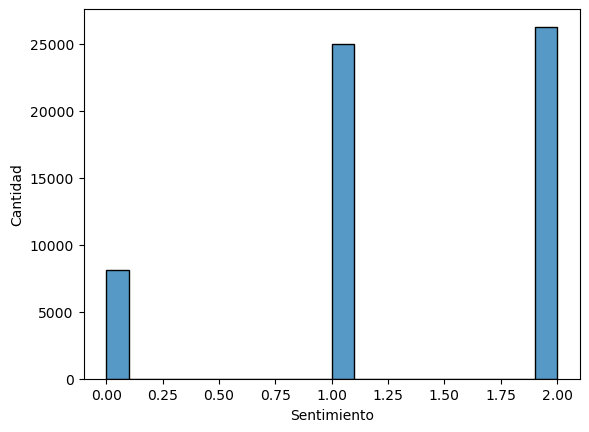

In [18]:

sns.histplot(df_reviews['sentiment_analysis'], bins=20)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

# Reducción de dimensionalidad y miramos los valores finales de los generos

In [19]:
#apilcando reduccion de dimensionalidad
def red_dim(df):
    df=df.drop(['item_id'],axis=1)
    # Sumar las columnas y crear un DataFrame
    sum_df = df.sum().reset_index()
    sum_df.columns = ['Genre', 'Count']
    # Convertir la columna "Count" a valores numéricos
    sum_df['Count'] = pd.to_numeric(sum_df['Count'], errors='coerce')
    # Ordenar el DataFrame por la columna "Count" de forma descendente
    sorted_df = sum_df.sort_values(by='Count', ascending=False)
    # Obtener los 20 géneros más comunes y sus recuentos
    top_20 = sorted_df.head(20)
    # Calcular el porcentaje de aparición de cada género
    total_count = top_20['Count'].sum()
    top_20['Percentage'] = (top_20['Count'] / total_count) * 100
    # Imprimir los resultados
    print(top_20)

In [20]:
red_dim(df_genres)

                    Genre  Count  Percentage
0                   Indie  15858   22.726361
1                  Action  11320   16.222878
2                  Casual   8282   11.869070
3               Adventure   8242   11.811746
4                Strategy   6957    9.970191
5              Simulation   6699    9.600447
6                     RPG   5479    7.852045
7            Free to Play   2031    2.910660
8            Early Access   1462    2.095216
9                  Sports   1257    1.801427
10  Massively Multiplayer   1108    1.587893
11                 Racing   1083    1.552065


C:\Users\lgtqa\AppData\Local\Temp\ipykernel_8280\1433727768.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['Percentage'] = (top_20['Count'] / total_count) * 100


Vemos que la mayoria de los juegos con indie, lo que tiene sentido ya que pueden ser juegos creados por una sola persona

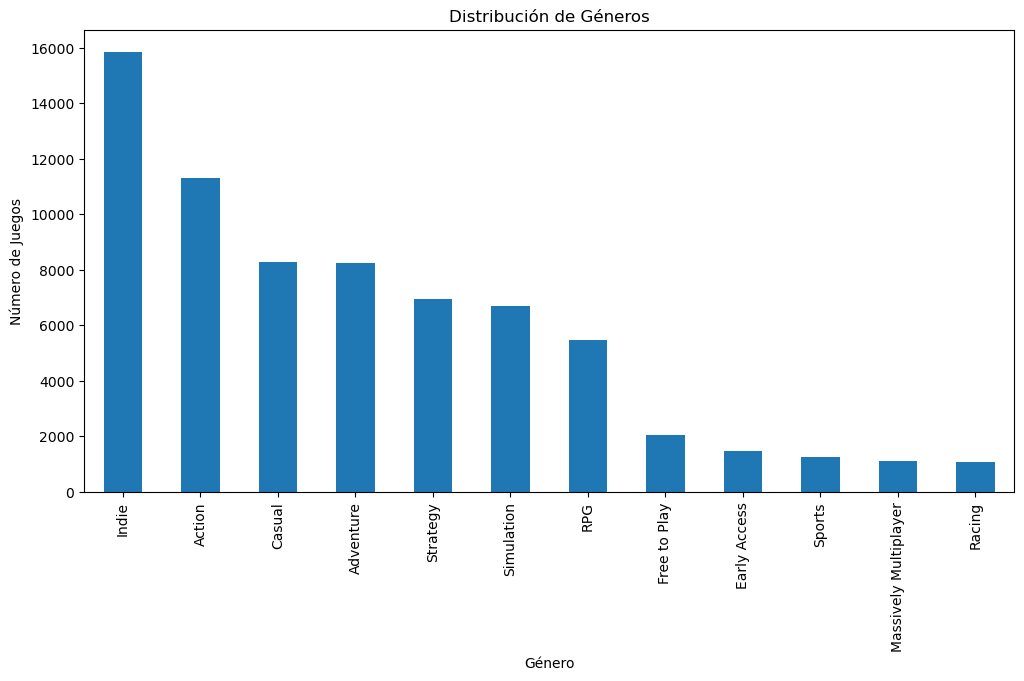

In [25]:
# Visualización para genres
# Sumar los valores de cada columna para contar cuántos juegos pertenecen a cada género
genre_counts=df_genres.drop(['item_id'],axis=1)
genre_counts = genre_counts.sum()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=90)
plt.show()